In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, preprocessing, metrics
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from glob import glob
train1 = pd.read_csv('train_dec10_task4_missing_supplement.csv')
train2 = pd.read_csv('train_dec08_task4_missing.csv')
test = pd.read_csv('test_dec08_task4_missing_only_features.csv')     

In [2]:
#將兩個data合併
train = pd.concat([train1,train2],axis=0, ignore_index=True)
train

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,class
0,2.081867,8.788375,21.309727,22.036929,9.181199,-3.138825,20.145857,2.037839,2.838533,0.952019,2.480322,3.771970,5.129140,5.971021,A
1,11.121799,4.360470,20.176954,15.535818,15.857875,18.811445,28.648405,8.334131,6.697799,2.650008,1.920968,0.470995,6.850101,3.983245,A
2,9.360281,6.364884,19.973465,15.704548,2.553840,6.662335,-1.669712,4.626235,5.583088,10.374848,6.088688,5.282418,5.478138,3.583519,A
3,5.677599,6.575935,7.418786,7.192065,10.894859,3.205532,8.636989,7.834803,4.348459,1.545665,3.662384,2.915680,3.982283,5.845878,A
4,5.189422,5.018343,20.001505,17.789371,0.435783,4.930763,-6.220989,5.797457,0.484183,2.278926,2.055776,4.887179,5.836831,5.183417,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,5.550650,7.467471,9.814982,13.292516,5.816327,10.592370,1.026512,5.632317,4.155529,11.317999,0.255037,NaN,6.529192,4.181720,D
12996,5.346601,NaN,27.959554,11.679617,-0.046006,11.488430,-1.563639,4.951369,10.800809,5.333013,1.506726,1.579180,5.201146,5.812940,D
12997,9.817992,10.604846,21.556543,9.799886,2.398715,13.032981,NaN,9.025625,3.591974,8.119941,0.830459,NaN,4.625309,5.776922,D
12998,11.643038,6.508086,11.728741,11.899123,8.347815,11.778516,20.047421,8.327387,1.041722,NaN,2.274868,5.411409,3.796259,6.784223,D


In [3]:
train.fillna(value=train.mean(), inplace=True)
#將缺失值補上平均值

C:\Users\david\AppData\Local\Temp\ipykernel_14344\1276518750.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(value=train.mean(), inplace=True)


In [3]:
# import numpy as np
# from sklearn.metrics import f1_score
# y_pred =train['feature0']  
# y_true =train['class'] 

# print(f1_score(y_true, y_pred, average='macro'))   #用F1 score算出特徵值分數 測試中

NameError: name 'train' is not defined

In [30]:
train.shape, test.shape  

((13000, 6), (1600, 5))

In [31]:
# 分割成特徵資料和標籤資料
X = train.iloc[:, 0:len(train.iloc[0,:-1])]
Y = train.iloc[:, -1]
print(X.shape)
print(Y.shape)
X[0:3]
X, Y

(13000, 5)
(13000,)


(        feature2   feature3   feature5   feature6   feature8
 0      21.309727  22.036929  -3.138825  20.145857   2.838533
 1      20.176954  15.535818  18.811445  28.648405   6.697799
 2      19.973465  15.704548   6.662335  -1.669712   5.583088
 3       7.418786   7.192065   3.205532   8.636989   4.348459
 4      20.001505  17.789371   4.930763  -6.220989   0.484183
 ...          ...        ...        ...        ...        ...
 12995   9.814982  13.292516  10.592370   1.026512   4.155529
 12996  27.959554  11.679617  11.488430  -1.563639  10.800809
 12997  21.556543   9.799886  13.032981   9.888275   3.591974
 12998  11.728741  11.899123  11.778516  20.047421   1.041722
 12999  11.897781  11.511646   9.846964  -0.919265  10.573488
 
 [13000 rows x 5 columns],
 0        A
 1        A
 2        A
 3        A
 4        A
         ..
 12995    D
 12996    D
 12997    D
 12998    D
 12999    D
 Name: class, Length: 13000, dtype: object)

In [32]:
alphabets = {'A':0, 'B':1, 'C':2,'D':3}
Y = [alphabets[ch] for ch in Y]
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [33]:
# 分割訓練和驗證資料集
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.33, random_state = 42)
print(X_train.shape,X_val.shape)

(8710, 5) (4290, 5)


In [34]:
# # 資料標準化(測試中)
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# # Standardize the training dataset
# X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
# # Standardized the testing dataset
# X_val= pd.DataFrame(sc.transform(X_val),index=X_val.index, columns=X_val.columns)

In [35]:
xgboostModel = XGBClassifier(n_estimators=200, learning_rate= 0.33, max_depth = 7,subsample=0.9)
xgboostModel.fit(X_train, Y_train)
#讀取xgboost模型

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.33, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }
grid = RandomizedSearchCV(xgboostModel,param_dist,cv = 3,scoring = 'neg_log_loss',n_jobs = -1,n_iter=100)
#用RandomSearch找出較佳模型參數，調整n_iter更改隨機測試次數

In [37]:
grid.fit(X_train,Y_train)
#進行RandomSearch

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.33,...
       1.58105263, 1.68578947, 1.79052632, 1.89526316, 2.        ]),
                                        'max_depth': range(2, 15),
  

In [38]:
best_estimator = grid.best_estimator_
print(best_estimator)
#印出RandomSearch答案

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.11473684210526315,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=13, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=104,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [39]:
xgboostModel = best_estimator
xgboostModel.fit(X_train, Y_train)
#將RandomSearch參數套入進模型中

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.11473684210526315,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=13, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=104,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [40]:
xgboostModel.score(X_val,Y_val)

0.7531468531468531

In [41]:
print('訓練集: ',xgboostModel.score(X_train,Y_train))
print('測試集: ',xgboostModel.score(X_val,Y_val))
# XGBClassifier(n_estimators=200, learning_rate= 0.33, max_depth = 7,subsample=0.9)

訓練集:  0.9721010332950631
測試集:  0.7531468531468531


[0.05879439 0.06009725 0.13040417 0.1321344  0.05974938 0.06346469
 0.06388069 0.06092304 0.06321839 0.0598198  0.0626782  0.0609528
 0.06256635 0.06131642]


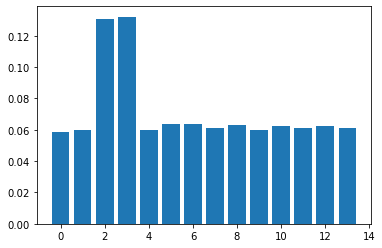

In [13]:
# feature importance
from matplotlib import pyplot
print(xgboostModel.feature_importances_)
# plot
pyplot.bar(range(len(xgboostModel.feature_importances_)), xgboostModel.feature_importances_)
pyplot.show()

In [14]:
train=train.drop(['feature0', 'feature1','feature4','feature9'], axis=1)
test=test.drop(['feature0', 'feature1','feature4','feature9'], axis=1)
#刪掉分數較低的特徵值，留前10個
#從train.shape, test.shape確認刪除後  開始跑

In [29]:
train=train.drop(['feature7', 'feature12','feature10','feature11','feature13'], axis=1)
test=test.drop(['feature7', 'feature12','feature10','feature11','feature13'], axis=1)
#刪掉分數較低的特徵值，留前50個
#從train.shape, test.shape確認刪除後  開始跑

In [42]:
# 預測
result=xgboostModel.predict(test)

print(result)

[2 3 3 ... 2 2 3]


In [43]:
pre = {'Id' : pd.Series(range(1,len(result)+1)), 
        'Category' : result}
pre = pd.DataFrame(pre)
pre

,Id,Category
0,1,2
1,2,3
2,3,3
3,4,2
4,5,1
...,...,...
1595,1596,2
1596,1597,2
1597,1598,2
1598,1599,2


In [44]:
pre.to_csv('task4_result_xgboost_5f.csv', index=False)